In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
from sklearn.datasets import fetch_mldata

In [136]:
mnist = fetch_mldata("MNIST original")

In [137]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [138]:
X, y = mnist["data"], mnist["target"]

In [139]:
import matplotlib

(-0.5, 27.5, 27.5, -0.5)

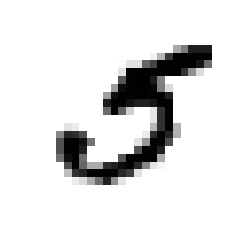

In [140]:
plt.imshow(X[36000].reshape(28,28,), cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [141]:
y[36000]

5.0

In [142]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #Ferdig splittet

In [143]:
shuffle_indexs = np.random.permutation(60000) 

In [144]:
X_train, y_train = X_train[shuffle_index], y[shuffle_index]

In [145]:
from sklearn.linear_model import SGDClassifier

In [146]:
sgd_clf = SGDClassifier(random_state=42)

In [147]:
y_train_5 = y_train == 5

In [148]:
y_test_5 = y_test == 5

In [149]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [150]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [151]:
sk_folds = StratifiedKFold(n_splits=3, random_state=42)

In [152]:
for train_index, test_index in sk_folds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Korrekt: " + str(n_correct / len(y_pred)))

Korrekt: 0.9013
Korrekt: 0.96565
Korrekt: 0.9639


In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9013 ,  0.96565,  0.9639 ])

In [155]:
from sklearn.model_selection import cross_val_predict

In [156]:
cross_predictions = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [157]:
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
print(confusion_matrix(y_train_5, cross_predictions))

[[52237  2342]
 [ 1041  4380]]


In [159]:
print(classification_report(y_train_5, cross_predictions))

             precision    recall  f1-score   support

      False       0.98      0.96      0.97     54579
       True       0.65      0.81      0.72      5421

avg / total       0.95      0.94      0.95     60000



In [160]:
test_score = sgd_clf.decision_function([X_train[3]])

In [161]:
test_score

array([-360181.7199458])

In [162]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [163]:
y_scores

array([-581596.6504452 , -514036.16506966,  156297.07041906, ...,
       -689378.89907845, -721574.28313508, -731154.08203955])

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [166]:
def plot_precision_vs_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

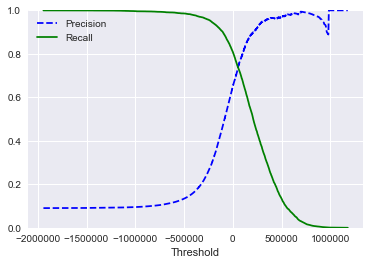

In [167]:
plot_precision_vs_recall(precisions, recalls, thresholds)

In [168]:
y_train_pred_90 = y_scores > 70000

In [170]:
print(classification_report(y_train_5, y_train_pred_90))

             precision    recall  f1-score   support

      False       0.97      0.98      0.98     54579
       True       0.76      0.72      0.74      5421

avg / total       0.95      0.95      0.95     60000



In [171]:
from sklearn.metrics import roc_curve

In [172]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [187]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], "k--")
    plt.axis([0,1, 0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

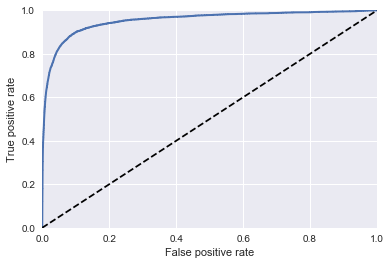

In [188]:
plot_roc_curve(fpr, tpr)

In [189]:
from sklearn.metrics import roc_auc_score

In [190]:
roc_auc_score(y_train_5, y_scores)

0.95411236219959006

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
forest = RandomForestClassifier(random_state=42)

In [195]:
y_probabilites = cross_val_predict(forest, X_train, y_train_5, cv=3, method="predict_proba")

In [196]:
y_scores_forest = y_probabilites[:, 1]

In [197]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

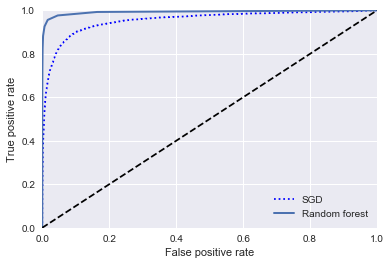

In [198]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc="lower right")

In [199]:
roc_auc_score(y_train_5, y_scores_forest)

0.99247967772524825

In [201]:
y_scores_forest

array([ 0. ,  0. ,  0.2, ...,  0. ,  0.2,  0. ])

In [202]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [203]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [204]:
sgd_clf.predict([X_train[100]])

array([ 6.])

In [205]:
y_train[100]

6.0

In [206]:
sgd_clf.decision_function([X_train[100]])

array([[-628026.35095435, -365181.87707831, -255702.21470747,
        -383585.52311384, -589941.80249879, -400639.99389356,
         271463.95727671, -659127.96205528, -254986.25647957,
        -382585.05031803]])

In [207]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [209]:
forest.predict([X_train[100]])

array([ 6.])

In [211]:
forest.predict_proba([X_train[100]])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [212]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87922416,  0.85309265,  0.84072611])

In [213]:
cross_val_score(forest, X_train, y_train, cv=3, scoring="accuracy"
            )

array([ 0.94006199,  0.94084704,  0.93914087])

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
scaler = StandardScaler()

In [216]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [217]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9105179 ,  0.90754538,  0.91028654])

In [218]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [219]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

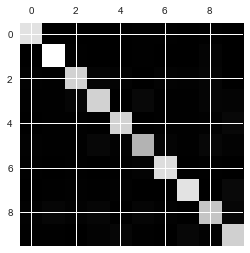

In [221]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)

In [222]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

In [223]:
np.fill_diagonal(norm_conf_mx, 0)

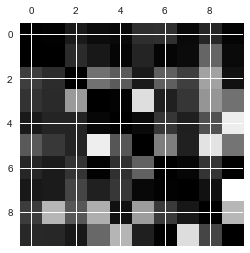

In [224]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)